In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime  

In [3]:
start = '2012-01-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'
# Get the data
data = yf.download(stock, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433828,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639423,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751297,394024400
...,...,...,...,...,...,...,...
3084,2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
3085,2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
3086,2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
3087,2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300


In [5]:
ma_100_days = data['Close'].rolling(100).mean()


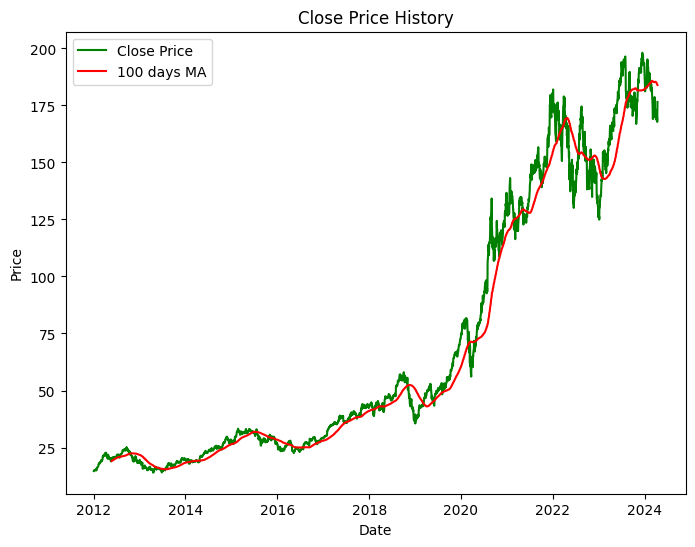

In [6]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_100_days, label='100 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [7]:
ma_200_days = data['Close'].rolling(200).mean()

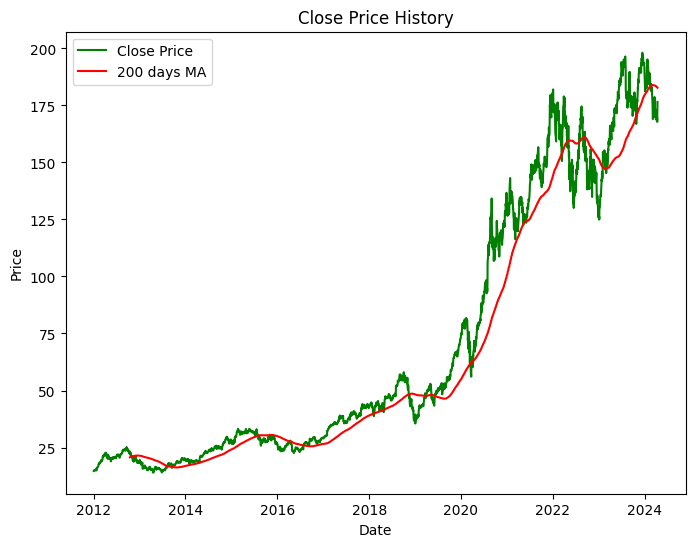

In [8]:
plt.figure(figsize=(8,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='g')
plt.plot(data['Date'], ma_200_days, label='200 days MA', color='r')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')


In [9]:
data.dropna(inplace=True)

## Training...  ##

In [10]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) 

In [11]:
data_train.shape[0], data_test.shape[0]

(2471, 618)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i,0])

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import backend


In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Jorge Esteban\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - loss: 0.0389
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0054
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0065
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0043
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0034
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0041
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0042
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0030
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.0025
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0024
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0024
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 0.0025
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - loss: 0.0026
Epoch 14/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0027
Epoch 15/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 1

In [20]:
model.save('stock_prediction.h5')

In [21]:
data_test.head()

,Close
2471,148.850006
2472,152.570007
2473,149.800003
2474,148.960007
2475,150.020004


In [25]:
past_100_days = data_train.tail(100)

In [36]:
final_df = past_100_days._append(data_test, ignore_index=True)
final_df.head()

,Close
0,125.900002
1,126.739998
2,127.129997
3,126.110001
4,127.349998


In [40]:
input_data = scaler.fit_transform(final_df)
input_data
input_data.shape

(718, 1)

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(618, 100, 1) (618,)


## Making Predictions ##

In [43]:
y_predicted = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


In [44]:
y_predicted.shape

(618, 1)

In [45]:
y_test

array([3.26036505e-01, 3.76932675e-01, 3.39034137e-01, 3.27541507e-01,
       3.42044141e-01, 3.62156347e-01, 3.54905030e-01, 3.59283085e-01,
       3.47790456e-01, 3.52852641e-01, 3.13312359e-01, 3.12628229e-01,
       3.41633705e-01, 3.41770447e-01, 3.55452209e-01, 3.89519870e-01,
       4.49445843e-01, 4.86113073e-01, 4.92543517e-01, 4.97879396e-01,
       5.05130713e-01, 4.34943210e-01, 4.81871760e-01, 5.51101440e-01,
       5.43850123e-01, 5.30031410e-01, 5.03762453e-01, 5.51375133e-01,
       6.31550055e-01, 6.84909050e-01, 6.77794476e-01, 7.44698281e-01,
       6.93939063e-01, 6.74647729e-01, 7.42646100e-01, 6.46326383e-01,
       6.31002876e-01, 6.11985236e-01, 6.56314219e-01, 6.92570803e-01,
       7.01327122e-01, 7.56738298e-01, 7.42509149e-01, 7.43740666e-01,
       7.27596079e-01, 7.18976711e-01, 7.79723557e-01, 7.48118721e-01,
       6.82719918e-01, 6.42769200e-01, 6.45095074e-01, 6.45368768e-01,
       6.84909050e-01, 6.91065801e-01, 6.45368768e-01, 6.57408785e-01,
      

In [46]:
y_predicted

array([[0.2737243 ],
       [0.28271127],
       [0.29173994],
       [0.30050173],
       [0.30864713],
       [0.31596452],
       [0.32244402],
       [0.3281337 ],
       [0.3331079 ],
       [0.33739185],
       [0.34102464],
       [0.34387398],
       [0.3458131 ],
       [0.3468598 ],
       [0.34719014],
       [0.34716934],
       [0.3472016 ],
       [0.34794173],
       [0.35025543],
       [0.35504457],
       [0.36307466],
       [0.37469164],
       [0.38815224],
       [0.4021288 ],
       [0.4167266 ],
       [0.43217403],
       [0.44809103],
       [0.4632116 ],
       [0.47725493],
       [0.49143445],
       [0.5074076 ],
       [0.5260085 ],
       [0.5478226 ],
       [0.572048  ],
       [0.5967504 ],
       [0.6210834 ],
       [0.6426259 ],
       [0.65931404],
       [0.66992164],
       [0.6749837 ],
       [0.6763728 ],
       [0.67622936],
       [0.6769167 ],
       [0.6797525 ],
       [0.6852188 ],
       [0.69273525],
       [0.7011115 ],
       [0.710

In [47]:
scaler.scale_

array([0.01368176])

In [48]:
scale_factor = 1/8.18605127e-04
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

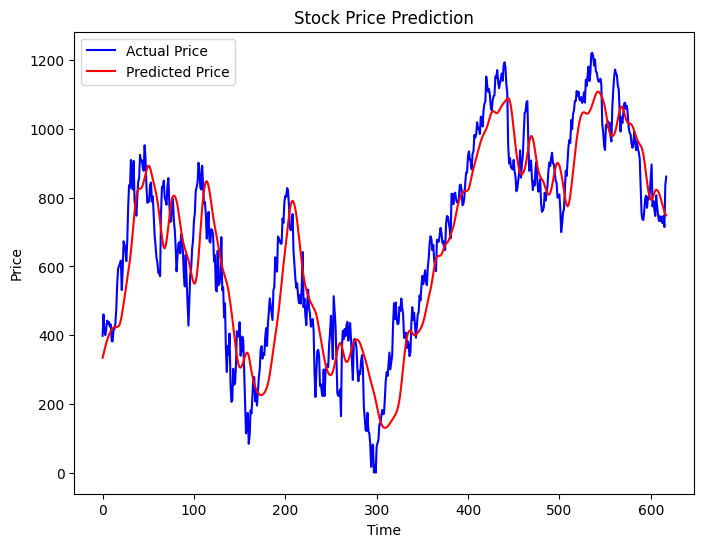

In [49]:
plt.figure(figsize=(8,6))
plt.plot(y_test, color='blue', label='Actual Price')
plt.plot(y_predicted, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')